In [327]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from joblib import dump, load

In [353]:
df = pd.read_csv('Solana.csv')

df. rename(columns = {'SNo':'Days'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df = df.loc[df['Year'] == 2021]

df.reset_index(inplace=True)


df.insert(1, "Day", np.arange(1,len(df) +1))

df.drop('index',axis=1, inplace=True)
df.drop('Days',axis=1, inplace=True)
df.drop('Date',axis=1, inplace=True)
df.head(150)

,Day,Price,Open,High,Low,Vol.,Change %,Year
0,1,1.832,1.512,1.832,1.512,1170000.0,21.24,2021
1,2,1.796,1.832,1.987,1.766,1500000.0,-2.01,2021
2,3,2.187,1.796,2.187,1.796,1470000.0,21.81,2021
3,4,2.467,2.187,2.467,2.187,1260000.0,12.78,2021
4,5,2.160,2.467,2.467,2.160,2190000.0,-12.46,2021
5,6,1.926,2.160,2.160,1.926,1110000.0,-10.80,2021
6,7,2.382,1.926,2.382,1.926,2830000.0,23.65,2021
7,8,3.210,2.382,3.210,2.382,561660.0,34.78,2021
8,9,3.359,3.210,3.359,3.210,456120.0,4.65,2021
9,10,3.460,3.359,3.730,3.280,566000.0,2.98,2021


### Transfiguring Date

In [329]:
'''df['Date'] = pd.to_datetime(df['Date']) 

df['Month'] = df['Date'].dt.month

df['Year'] = df['Date'].dt.year

df['Day'] = df['Date'].dt.day
'''
'''df = df.sample(n = len(df), random_state=42)
df = df.reset_index(drop = True)

df_test = df.sample(frac = 0.3, random_state = 42)
df_train = df.drop(df_test.index)

df
'''

'df = df.sample(n = len(df), random_state=42)\ndf = df.reset_index(drop = True)\n\ndf_test = df.sample(frac = 0.3, random_state = 42)\ndf_train = df.drop(df_test.index)\n\ndf\n'

     Day
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
42    43
43    44
44    45
45    46
46    47
47    48
48    49
49    50
50    51
51    52
52    53
53    54
54    55
55    56
56    57
57    58
58    59
59    60
60    61
61    62
62    63
63    64
64    65
65    66
66    67
67    68
68    69
69    70
70    71
71    72
72    73
73    74
74    75
75    76
76    77
77    78
78    79
79    80
80    81
81    82
82    83
83    84
84    85
85    86
86    87
87    88
88    89
89    90
90    91
91    92
92    93
93    94
94    95
95    96
96    97
97    98
98    99
99   100
100  101
101  102
102  103
103  104
104  105
105  106
106  107
107  108
108  109
109  110
1

<AxesSubplot:xlabel='Day'>

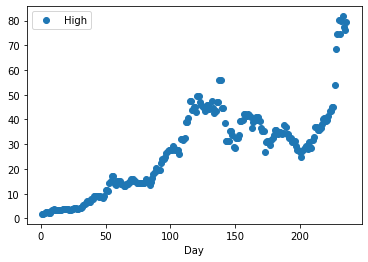

In [354]:
'''df.isnull().sum() # checking to see if there are any null / NaN valuesa

df.drop('Date', axis=1)'''


#X_train = df_train[col2use].values
#X_test = df_test[col2use].values

#y_train = df_train['Day'].values
#y_test = df_train['Day'].values

#y_train.shape
#X_test.shape

X_solana = df[['Day', 'Price','Low', 'Change %']]
print(X_solana)

# df.iloc[:,1:2].values


y_solana = df[['High']]

#df.iloc[:,4:5].values

X_train, X_test, y_train, y_test = train_test_split(X_solana, y_solana, test_size=0.25)
#X_solana.shape
y_solana.shape

df.plot(x='Day', y='High', style='o')


In [355]:
'''x = df

x = x.loc[(x['Month'] == 8) & (x['Year'] == 2021)]


# calculate ATH for a specific month's day
x = x.reset_index()
x = x.drop('index', axis=1)

#x = ['Price', 'Open', 'High', 'Low', 'Change %', 'Vol.', 'Month']
#x = df[x].values'''
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)


y_pred = model.predict(X_test)

#mean_absolute_error(y_test, prediction )


y_pred = pd.DataFrame(data = y_pred, columns = ['HighsPred'], index = X_test.index.copy())
x_test = pd.DataFrame(index = X_test.index.copy())
#model.predict([[29]])
pd.set_option('max_row', None)

#df.shape
#df[['y_pred']] = y_pred
#y_pred.shape

new_df = pd.concat([x_test,y_pred], axis = 1)

new_df

,HighsPred
101,24.202792
67,17.077877
138,31.956376
185,41.805522
33,9.952963
151,34.680608
165,37.614396
18,6.809618
230,51.235556
142,32.794601


In [356]:
'''y = x['Day'].values

x = x.drop('Day', axis=1)

x = x.values

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)'''
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.30512239690932
Mean Squared Error: 115.63188078689215
Root Mean Squared Error: 10.753226529134972


In [238]:
'''model = LinearRegression(fit_intercept=True)

model.fit(Xtrain, ytrain)

'''

'model = LinearRegression(fit_intercept=True)\n\nmodel.fit(Xtrain, ytrain)\n\n'